In [22]:
import os.path
from pyspark.mllib.stat import Statistics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
headers = 'Age,"AttendedBootcamp","BootcampFinish","BootcampFullJobAfter","BootcampLoanYesNo","BootcampMonthsAgo","BootcampName","BootcampPostSalary","BootcampRecommend","ChildrenNumber","CityPopulation","CodeEventBootcamp","CodeEventCoffee","CodeEventConferences","CodeEventDjangoGirls","CodeEventGameJam","CodeEventGirlDev","CodeEventHackathons","CodeEventMeetup","CodeEventNodeSchool","CodeEventNone","CodeEventOther","CodeEventRailsBridge","CodeEventRailsGirls","CodeEventStartUpWknd","CodeEventWomenCode","CodeEventWorkshop","CommuteTime","CountryCitizen","CountryLive","EmploymentField","EmploymentFieldOther","EmploymentStatus","EmploymentStatusOther","ExpectedEarning","FinanciallySupporting","Gender","HasChildren","HasDebt","HasFinancialDependents","HasHighSpdInternet","HasHomeMortgage","HasServedInMilitary","HasStudentDebt","HomeMortgageOwe","HoursLearning","ID.x","ID.y","Income","IsEthnicMinority","IsReceiveDiabilitiesBenefits","IsSoftwareDev","IsUnderEmployed","JobApplyWhen","JobPref","JobRelocateYesNo","JobRoleInterest","JobRoleInterestOther","JobWherePref","LanguageAtHome","MaritalStatus","MoneyForLearning","MonthsProgramming","NetworkID","Part1EndTime","Part1StartTime","Part2EndTime","Part2StartTime","PodcastChangeLog","PodcastCodeNewbie","PodcastCodingBlocks","PodcastDeveloperTea","PodcastDotNetRocks","PodcastHanselminutes","PodcastJSJabber","PodcastJsAir","PodcastNone","PodcastOther","PodcastProgrammingThrowDown","PodcastRubyRogues","PodcastSEDaily","PodcastShopTalk","PodcastTalkPython","PodcastWebAhead","ResourceBlogs","ResourceBooks","ResourceCodeWars","ResourceCodecademy","ResourceCoursera","ResourceDevTips","ResourceEdX","ResourceEggHead","ResourceFCC","ResourceGoogle","ResourceHackerRank","ResourceKhanAcademy","ResourceLynda","ResourceMDN","ResourceOdinProj","ResourceOther","ResourcePluralSight","ResourceReddit","ResourceSkillCrush","ResourceSoloLearn","ResourceStackOverflow","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3Schools","ResourceYouTube","SchoolDegree","SchoolMajor","StudentDebtOwe"'
headers = map((lambda (i, header): '{0} {1}'.format(i, header.replace('"', ''))), enumerate(headers.split(',')))

for h in headers:
    print h

0 Age
1 AttendedBootcamp
2 BootcampFinish
3 BootcampFullJobAfter
4 BootcampLoanYesNo
5 BootcampMonthsAgo
6 BootcampName
7 BootcampPostSalary
8 BootcampRecommend
9 ChildrenNumber
10 CityPopulation
11 CodeEventBootcamp
12 CodeEventCoffee
13 CodeEventConferences
14 CodeEventDjangoGirls
15 CodeEventGameJam
16 CodeEventGirlDev
17 CodeEventHackathons
18 CodeEventMeetup
19 CodeEventNodeSchool
20 CodeEventNone
21 CodeEventOther
22 CodeEventRailsBridge
23 CodeEventRailsGirls
24 CodeEventStartUpWknd
25 CodeEventWomenCode
26 CodeEventWorkshop
27 CommuteTime
28 CountryCitizen
29 CountryLive
30 EmploymentField
31 EmploymentFieldOther
32 EmploymentStatus
33 EmploymentStatusOther
34 ExpectedEarning
35 FinanciallySupporting
36 Gender
37 HasChildren
38 HasDebt
39 HasFinancialDependents
40 HasHighSpdInternet
41 HasHomeMortgage
42 HasServedInMilitary
43 HasStudentDebt
44 HomeMortgageOwe
45 HoursLearning
46 ID.x
47 ID.y
48 Income
49 IsEthnicMinority
50 IsReceiveDiabilitiesBenefits
51 IsSoftwareDev
52 IsUn

In [24]:
base_dir = os.path.join('data')
input_path = os.path.join('2016-FCC-New-Coders-Survey-Data.csv')

file_name = os.path.join(base_dir, input_path)

# Code to read each character and parse it
# Results in a beautifully split line! :)
def split(l):
    mappedLine = []
    tmp = ''
    in_string = False
    
    for c in l:
        if c == ',':
            if in_string:
                tmp += c
            else:
                mappedLine.append(tmp)
                tmp = ''
        elif c == '"':
            in_string = not in_string
        else:
            tmp += c
    
    return mappedLine

filtered_set = sc.textFile(file_name).filter(lambda l: 'AttendedBootcamp' not in l).map(split)

print 'Count of records : ' + str(filtered_set.count())

Count of records : 15620


In [25]:
def make_features(line):
    features = []
    
    gender = line[36].lower()
    
    if gender == 'male':
        features.extend([1, 0, 0, 0])
    elif gender == 'female':
        features.extend([0, 1, 0, 0])
    elif gender == 'na':
        features.extend([0, 0, 0, 1])
    else:
        features.extend([0, 0, 1, 0])
    return features

featured = filtered_set.map(make_features)

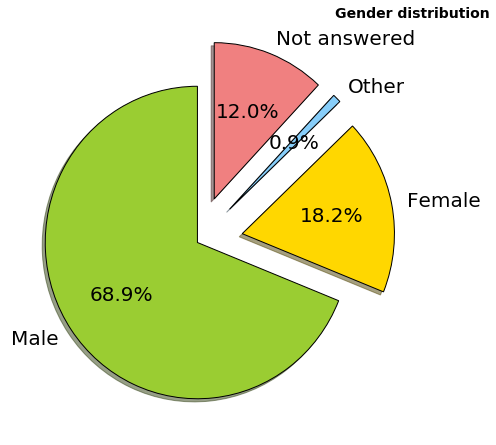

In [26]:
%matplotlib inline

# Make the percentages bigger! (readability)
mpl.rcParams['font.size'] = 20.0

summary1 = Statistics.colStats(featured)
mean1 = summary1.mean()
fracs1 = [mean1[0], mean1[1], mean1[2], mean1[3]]

explode = (0.0, 0.3, 0.3, 0.3)
labels = ['Male', 'Female', 'Other', 'Not answered']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Gender distribution', fontsize=14, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.pie(fracs1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

pass

In [27]:
"""
Gender calculations
Not meant to be used like this!
"""

from collections import defaultdict
genders = defaultdict(lambda : 0)
collected = filtered_set.collect()
for l in collected:
    genders[l[36]] += 1
for x in genders:
    print '{} {}'.format(x, genders[x])

male 10766
NA 1874
female 2840
agender 38
trans 36
genderqueer 66


In [28]:
"""
Age barrplot calculations
"""
def make_features_age(line):
    features_age = []
    
    
    
    age = line[0]
    
    if age == 'NA':
        features_age.extend([1, 0, 0, 0, 0])
    else:
        age = int(age)
        if age <= 20:
            features_age.extend([0, 1, 0, 0, 0])
        elif age > 20 and age <= 35:
            features_age.extend([0, 0, 1, 0, 0])
        elif age > 35 and age <= 50:
            features_age.extend([0, 0, 0, 1, 0])
        else:
            features_age.extend([0, 0, 0, 0, 1])
    return features_age

featured_age = filtered_set.map(make_features_age)

#for x in featured_age.collect(): 
#    print x

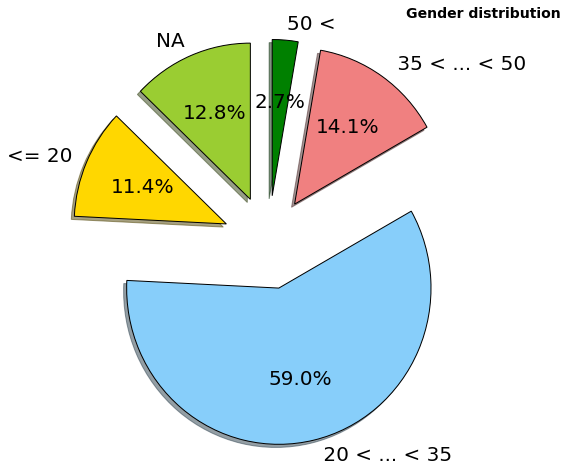

PlotlyLocalCredentialsError: 
Couldn't find a 'username', 'api-key' pair for you on your local machine. To sign in temporarily (until you stop running Python), run:
>>> import plotly.plotly as py
>>> py.sign_in('username', 'api_key')

Even better, save your credentials permanently using the 'tools' module:
>>> import plotly.tools as tls
>>> tls.set_credentials_file(username='username', api_key='api-key')

For more help, see https://plot.ly/python.


In [32]:
%matplotlib inline

# Make the percentages bigger! (readability)
mpl.rcParams['font.size'] = 20.0

summary_age = Statistics.colStats(featured_age)
mean_age = summary_age.mean()
fracs_age = [mean_age[0], mean_age[1], mean_age[2], mean_age[3], mean_age[4]]

explode = (0.3, 0.3, 0.3, 0.3, 0.3)
labels = ['NA', '<= 20', ' 20 < ... < 35', ' 35 < ... < 50', '50 <']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'green']
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Gender distribution', fontsize=14, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.pie(fracs_age, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()



import matplotlib.pyplot as plt

import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")


fig = plt.gcf()
plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')

pass